# Explore Census MBS Combined Dataset (Non-Pivot)

Repeated steps in script 9 to create categories for non-pivot version of the MBS-Census datasets for EDA. Exported the file in to csv and pickle files. 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import os
import matplotlib.pyplot as plt

## Import Dataset (Non Pivot)

In [24]:
# import the census and assign to a dataframe

# setup path to original dataset
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"
df_mbs_census = pd.read_pickle(
    os.path.join(path, "clean_datasets/2014_22_mbs_cenus_combined_no_pivot.pkl")
)
df_mbs_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229432 entries, 0 to 229431
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            229432 non-null  int64  
 1   StateTerritory                  229432 non-null  object 
 2   GeographicCode                  229432 non-null  object 
 3   GeographicAreaName              229432 non-null  object 
 4   GeographicGroup                 229432 non-null  object 
 5   ServiceLevel                    229432 non-null  object 
 6   Service                         229432 non-null  object 
 7   DemographicGroup                229432 non-null  object 
 8   MBS_per_100                     229432 non-null  float64
 9   No_of_patients                  229432 non-null  Int32  
 10  No_of_services                  229432 non-null  Int64  
 11  %_People_had_service            229432 non-null  float64
 12  Services_100_peo

## Extract Service Level 1 Data

In [25]:
df_mbs_census_s1 = df_mbs_census[df_mbs_census["ServiceLevel"] == "Level 1"]
df_mbs_census_s1["Service"].unique()

array(['Allied Health attendances (total)', 'Diagnostic Imaging (total)',
       'GP attendances (total)',
       'Nursing and Aboriginal Health Workers (total)',
       'Specialist attendances (total)'], dtype=object)

In [26]:
df_mbs_census_s1["Year"].value_counts(dropna="False")

2020    11555
2021    11554
2017    11520
2016    11518
2018    11518
2015    11506
2014    11502
2022    11487
2019    11432
Name: Year, dtype: int64

In [27]:
df_mbs_census_s1["Service"].value_counts(dropna=False)

Allied Health attendances (total)                20759
Diagnostic Imaging (total)                       20759
GP attendances (total)                           20759
Specialist attendances (total)                   20759
Nursing and Aboriginal Health Workers (total)    20556
Name: Service, dtype: int64

In [28]:
df_mbs_census_s1.to_csv(
    (os.path.join(path, "clean_datasets/cleaned_csv/2014-22_combined_service_1.csv"))
)

In [29]:
df_mbs_census_s1.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

## Create Categorical Plots (All person)

### Cost Burden Category

Cost of burden shows financial burden on a person per year for using medicare services. This is not relative to the income.

Using out of pocket cost per person (by year) to determine the burden category

In [30]:
df_mbs_census_s1["DemographicGroup"].unique()

array(['0-24', '25-44', '45-64', '65+', 'All persons', 'Females', 'Males'],
      dtype=object)

<Axes: xlabel='Out_of_pocket_cost_per_person', ylabel='Count'>

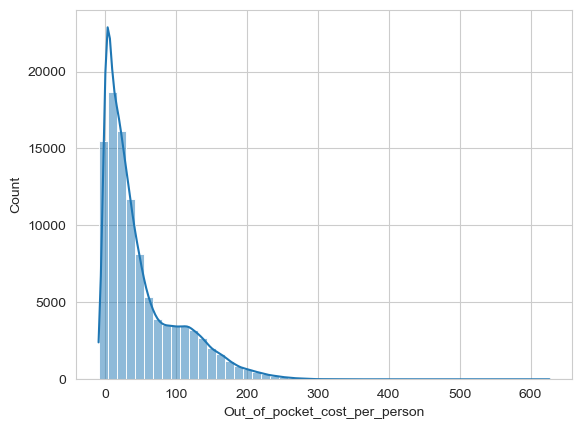

In [31]:
sns.histplot(df_mbs_census_s1["Out_of_pocket_cost_per_person"], bins=50, kde=True)

In [32]:
# Low Burden to Patients (less than $30)
df_mbs_census_s1.loc[
    df_mbs_census_s1["Out_of_pocket_cost_per_person"] <= 30,
    "Cost_Burden",
] = "Low Burden"

# Moderate Burden ($30 to $70)
df_mbs_census_s1.loc[
    (df_mbs_census_s1["Out_of_pocket_cost_per_person"] > 30)
    & (df_mbs_census_s1["Out_of_pocket_cost_per_person"] <= 70),
    "Cost_Burden",
] = "Moderate Burden"

# High Burden ($70 to $120)
df_mbs_census_s1.loc[
    (df_mbs_census_s1["Out_of_pocket_cost_per_person"] > 70)
    & (df_mbs_census_s1["Out_of_pocket_cost_per_person"] <= 120),
    "Cost_Burden",
] = "High Burden"

# Severe Burden ($120+)
df_mbs_census_s1.loc[
    df_mbs_census_s1["Out_of_pocket_cost_per_person"] > 120,
    "Cost_Burden",
] = "Severe Burden"

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_13644/2545532357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbs_census_s1.loc[


In [33]:
df_mbs_census_s1["Cost_Burden"].value_counts()

Low Burden         51664
Moderate Burden    24966
High Burden        13856
Severe Burden      13106
Name: Cost_Burden, dtype: int64

In [34]:
df_mbs_census_s1_all_person = df_mbs_census_s1[
    df_mbs_census_s1["DemographicGroup"] == "All persons"
]

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


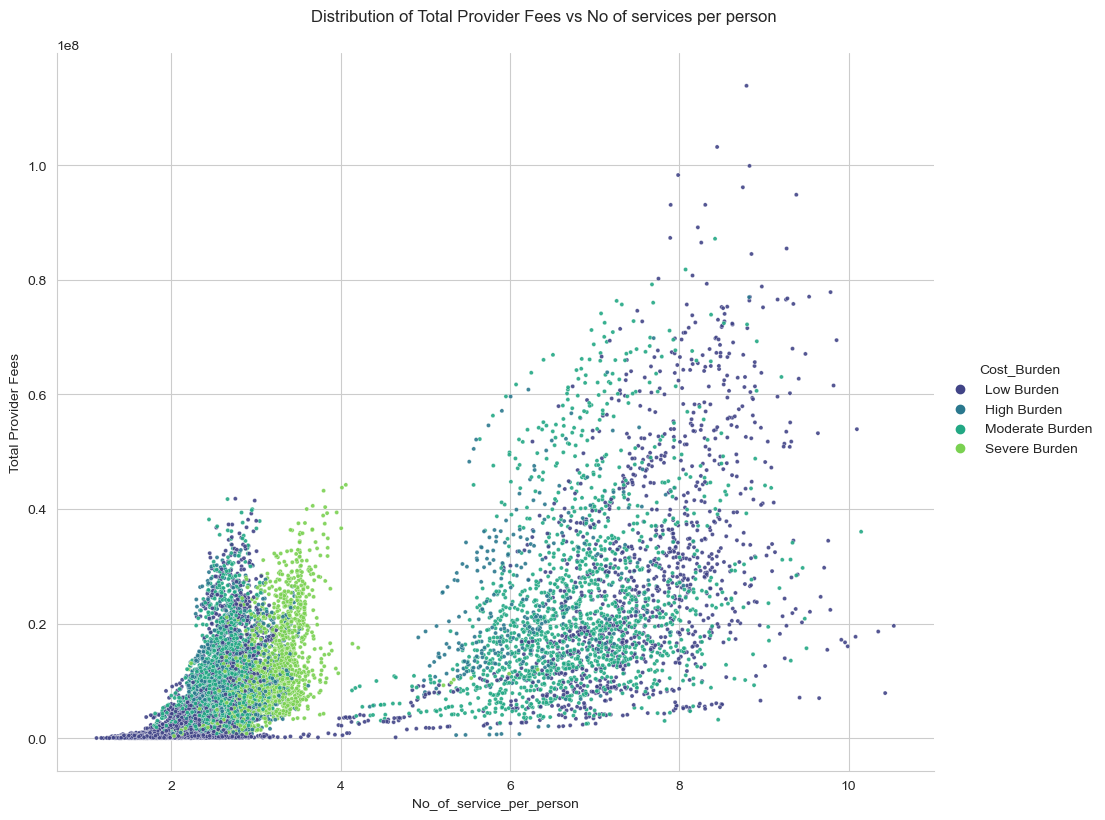

In [35]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_mbs_census_s1_all_person,
    x="No_of_service_per_person",
    y="Total_provider_fees_$",
    hue="Cost_Burden",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=9,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.9,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("No_of_service_per_person", "Total Provider Fees")
g.figure.suptitle(
    "Distribution of Total Provider Fees vs No of services per person", y=1.02
)

# Show the plot
plt.show()

### Service Usage Categorgies

<Axes: xlabel='No_of_service_per_person', ylabel='Count'>

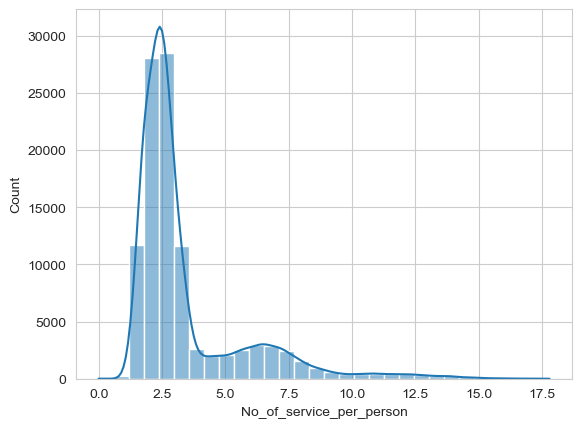

In [36]:
sns.histplot(df_mbs_census_s1["No_of_service_per_person"], bins=30, kde=True)

In [37]:
# Low usage of Services - 0 to 3 services a year
df_mbs_census_s1.loc[
    df_mbs_census_s1["No_of_service_per_person"] <= 3,
    "Service_Usage",
] = "Low Usage"

# Moderate Burden between 3 to 6 services a year
df_mbs_census_s1.loc[
    (df_mbs_census_s1["No_of_service_per_person"] > 3)
    & (df_mbs_census_s1["No_of_service_per_person"] <= 6),
    "Service_Usage",
] = "Moderate Usage"

# High usage of services - more than 6 times a year
df_mbs_census_s1.loc[
    df_mbs_census_s1["No_of_service_per_person"] > 6,
    "Service_Usage",
] = "High Usage"

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_13644/1641400450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbs_census_s1.loc[


In [38]:
df_mbs_census_s1["Service_Usage"].value_counts()

Low Usage         69424
Moderate Usage    20063
High Usage        14105
Name: Service_Usage, dtype: int64

### Service Coverage Level

Determining coverage level requried of services. This shows coverage level required in areas

<Axes: xlabel='%_People_had_service', ylabel='Count'>

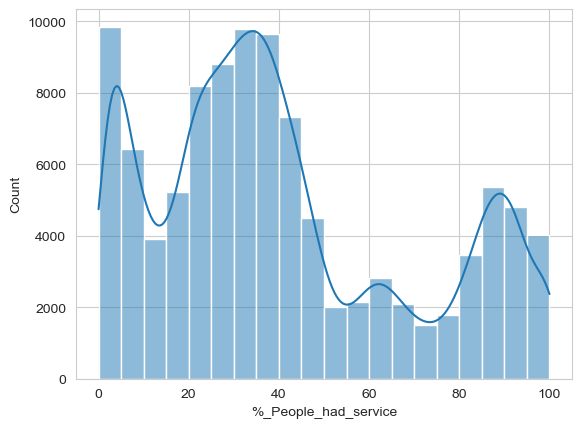

In [39]:
sns.histplot(df_mbs_census_s1["%_People_had_service"], bins=20, kde=True)

    Low Coverage = 0-25
    Moderate Coverage = 25-50%
    High Coverage = 50-75%
    Critical Coverage = 75-100%

In [40]:
# Low Coverage - 0 to 25% used
df_mbs_census_s1.loc[
    df_mbs_census_s1["%_People_had_service"] <= 25,
    "Service_Coverage",
] = "Low Coverage"

# Moderate Coverge - 25 to 50% used the service
df_mbs_census_s1.loc[
    (df_mbs_census_s1["%_People_had_service"] > 25)
    & (df_mbs_census_s1["%_People_had_service"] <= 50),
    "Service_Coverage",
] = "Moderate Coverage"

# High coverage - 50-75% used the service
df_mbs_census_s1.loc[
    (df_mbs_census_s1["%_People_had_service"] > 50)
    & (df_mbs_census_s1["%_People_had_service"] <= 75),
    "Service_Coverage",
] = "Moderate Coverage"

# Critical Coverage - 75% require service
df_mbs_census_s1.loc[
    df_mbs_census_s1["%_People_had_service"] > 75,
    "Service_Coverage",
] = "Critical Coverage"

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_13644/187567761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mbs_census_s1.loc[


In [41]:
df_mbs_census_s1["Service_Coverage"].value_counts()

Moderate Coverage    50601
Low Coverage         33573
Critical Coverage    19418
Name: Service_Coverage, dtype: int64

In [42]:
df_mbs_census_s1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103592 entries, 0 to 229389
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            103592 non-null  int64  
 1   StateTerritory                  103592 non-null  object 
 2   GeographicCode                  103592 non-null  object 
 3   GeographicAreaName              103592 non-null  object 
 4   GeographicGroup                 103592 non-null  object 
 5   ServiceLevel                    103592 non-null  object 
 6   Service                         103592 non-null  object 
 7   DemographicGroup                103592 non-null  object 
 8   MBS_per_100                     103592 non-null  float64
 9   No_of_patients                  103592 non-null  Int32  
 10  No_of_services                  103592 non-null  Int64  
 11  %_People_had_service            103592 non-null  float64
 12  Services_100_peo

## Export Updated MBS Service Level 1

In [43]:
df_mbs_census_s1.to_csv(
    (
        os.path.join(
            path, "clean_datasets/cleaned_csv/2014-22_combined_service_1_categories.csv"
        )
    )
)

In [44]:
df_mbs_census_s1.to_pickle(
    os.path.join(
        path, "clean_datasets/2014-22_combined_service_1_categories_no_pivot.pkl"
    )
)